In [2]:
import sys
import os
script_dir = os.path.abspath(os.path.join('..', '..', 'numpy', '1D'))
sys.path.append(script_dir)
from utils import *
from env import *
from model import *

In [8]:
# set directory to folder with model trained with different place field parameter combinations
data_dir = "/Users/mganeshkumar/Library/CloudStorage/OneDrive-HarvardUniversity/Code/online_pf_learning/online/1D"

In [9]:
seed = 2
expt = f"/r_shift/1D_td_shift_0.0ba_0.0001ns_012p_256n_0.0005plr_0.0005clr_0.0005llr_0.0005alr_0.0005slr_rand_all_2a_{seed}s_50000e_5rmax_0.05rsz"

[logparams, cum_rewards, allcoords] = saveload(data_dir+expt,1,"load")

In [15]:
def plot_place_cells(params,startcoord, goalcoord,goalsize, title='', envsize=1):
    xs = np.linspace(-envsize,envsize,1000)
    pcacts = []
    velocity = []
    for x in xs:
        pc = predict_placecell(params, x)
        actout = np.matmul(pc, params[3])
        aprob = softmax(2 * actout)
        if params[3].shape[1] == 3:
            vel = np.matmul(aprob, np.array([[-1], [1], [0]]))
        else:
            vel = np.matmul(aprob, np.array([[-1], [1]]))
        pcacts.append(pc)
        velocity.append(np.tanh(vel)*0.1)
    pcacts = np.array(pcacts)
    velocity = np.array(velocity)

    plt.figure(figsize=(3,2))
    plt.title(title)

    cmap = cm.viridis
    num_curves = pcacts.shape[1]
     
    for i in range(num_curves):
        color = cmap(i / num_curves)
        plt.plot(xs, pcacts[:, i], color=color)

    plt.hlines(xmin=-envsize,xmax=envsize, y=0, colors='k')
    plt.axvline(startcoord[0], color='g',linestyle='--',label='Start', linewidth=2)
    plt.fill_between(xs, reward_func(xs, goalcoord, goalsize), color='red', alpha=0.25, label='Target')
    plt.ylabel('$\phi(x)$')
    plt.xlabel('$x$')
    plt.tight_layout()
    return pcacts

array([[1.67847104e-018, 2.88807923e-001, 6.70924797e-102, ...,
        0.00000000e+000, 7.26094128e-114, 0.00000000e+000],
       [1.85194125e-018, 2.85709410e-001, 1.66635351e-101, ...,
        0.00000000e+000, 2.38856517e-113, 0.00000000e+000],
       [2.04299903e-018, 2.82620590e-001, 4.13110143e-101, ...,
        4.80429434e-320, 7.83583338e-113, 0.00000000e+000],
       ...,
       [7.31090287e-012, 6.64603180e-024, 1.66712136e-102, ...,
        0.00000000e+000, 3.95370626e-192, 0.00000000e+000],
       [6.83129957e-012, 6.05060017e-024, 6.68138179e-103, ...,
        0.00000000e+000, 8.34959067e-193, 0.00000000e+000],
       [6.38209478e-012, 5.50805550e-024, 2.67282660e-103, ...,
        0.00000000e+000, 1.75844949e-193, 0.00000000e+000]])

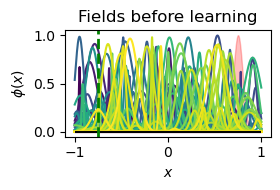

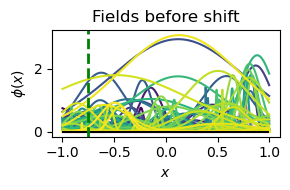

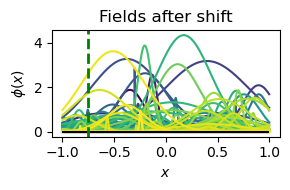

In [16]:
startcoord = [-0.75]
goalcoords = [0.75, -0.2]
goalsize = 0.05

trials = [0,50000, 100000]

plot_place_cells(logparams[trials[0]], startcoord=startcoord, goalcoord=[goalcoords[0]],goalsize=goalsize, title='Fields before learning',envsize=1)

plot_place_cells(logparams[trials[1]], startcoord=startcoord, goalcoord=[goalcoords[0]],goalsize=goalsize, title='Fields before shift',envsize=1)

plot_place_cells(logparams[trials[2]], startcoord=startcoord, goalcoord=[goalcoords[1]],goalsize=goalsize, title='Fields after shift',envsize=1)




In [18]:
seeds = 11
trials = [0,50000, 100000]
xs = np.linspace(-1,1,1001)
dxs = np.zeros([3,seeds, len(xs)])
vels = np.zeros([3, seeds, len(xs)])
allx = []
ally = []
for seed in range(seeds):
    expt = f"/r_shift/1D_td_shift_0.0ba_0.0001ns_012p_256n_0.0005plr_0.0005clr_0.0005llr_0.0005alr_0.0005slr_rand_all_2a_{seed}s_50000e_5rmax_0.05rsz"

    [logparams, cum_rewards, allcoords] = saveload(data_dir+expt,1,"load")
    print(f'Seed {seed}, {cum_rewards[-5:]}')
    if cum_rewards[-1]<5:
        print(f'Skip seed {seed}, {cum_rewards[-5:]}')
    else:

        for t,trial in enumerate(trials):
            pcacts = predict_batch_placecell(logparams[trial], xs)
            actout = np.matmul(pcacts, logparams[trial][3])
            aprob = softmax(actout)
            vel = np.matmul(aprob, np.array([[-1], [1]]))
            vels[t,seed] = (np.tanh(vel)*0.1)[:,0]

            com = xs[np.argmax(pcacts,axis=0)]
            kde = gaussian_kde(com,bw_method=1/11)
            dxs[t,seed] = kde(xs)
        
        allx.append(logparams[50000][0])
        ally.append(logparams[-1][0])

    

Seed 0, [5.315271356930917, 5.315271356930917, 5.315271356930917, 5.315271356930917, 5.315271356930917]
Seed 1, [5.315271356930917, 5.315271356930917, 5.315271356930917, 5.315271356930917, 5.315271356930917]
Seed 2, [5.005889118604569, 5.005889118604569, 5.005889118604569, 5.005889118604569, 5.315271356930917]
Seed 3, [5.315271356930917, 5.315271356930917, 5.315271356930917, 5.315271356930917, 5.315271356930917]
Seed 4, [5.315271356930917, 5.315271356930917, 5.315271356930917, 5.315271356930917, 5.315271356930917]
Seed 5, [5.315271356930917, 5.315271356930917, 5.315271356930917, 5.315271356930917, 5.315271356930917]
Seed 6, [5.315271356930917, 5.315271356930917, 5.315271356930917, 5.315271356930917, 5.315271356930917]
Seed 7, [5.315271356930917, 5.315271356930917, 5.315271356930917, 5.315271356930917, 5.315271356930917]
Seed 8, [5.315271356930917, 5.315271356930917, 5.864380115839812, 5.315271356930917, 5.005889118604569]
Seed 9, [5.315271356930917, 5.315271356930917, 5.315271356930917

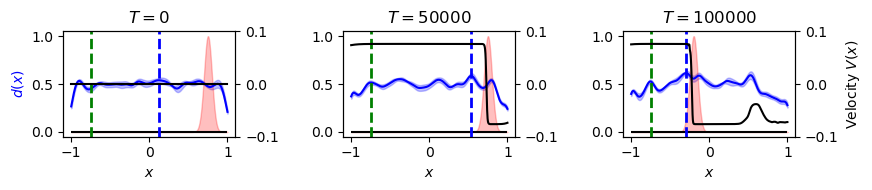

In [19]:
f,ax = plt.subplots(1,3,figsize=(3*3,1*2))
ax = ax.flatten()
goalcoords = [0.75,0.75,-0.2]
startcoord = [-0.75]
goalsize = 0.05
trials = [0,50000, 100000]

for t, trial in enumerate(trials):
    ax[t].set_title(f'$T={trial}$')
    meand = np.mean(dxs[t],axis=0)
    cid = np.std(dxs[t],axis=0)/np.sqrt(seeds)
    ax[t].plot(xs, meand, color='b', zorder=2)
    
    ax[t].fill_between(xs, meand-cid, meand+cid, color='b', alpha=0.25)

    ax[t].hlines(xmin=-1,xmax=1, y=0, colors='k')
    ax[t].axvline(startcoord[0], color='g',linestyle='--',label='Start', linewidth=2)
    tmax = xs[np.argmax(np.mean(dxs[t],axis=0))]

    ax[t].axvline(tmax, color='b', linestyle='--',label=np.round(tmax,3), linewidth=2,zorder=3)
    # plt.fill_betweenx(np.linspace(0,np.max(np.sum(pcacts,axis=1))), goalcoord[0]-goalsize, goalcoord[0]+goalsize, color='r', alpha=0.25)
    ax[t].fill_between(xs, reward_func(xs, goalcoords[t], goalsize), color='red', alpha=0.25, label='Target')
    if t ==0 :
        ax[t].set_ylabel('$d(x)$', color='b')
    
    ax[t].set_xlabel('$x$')
    ax2 = ax[t].twinx()
    ax2.plot(xs, np.mean(vels[t],axis=0), color='k')
    if t ==2:
        ax2.set_ylabel('Velocity $V(x)$')
    ax2.set_ylim(-0.1,0.1)

f.tight_layout()

19 734 2.5885558583106265


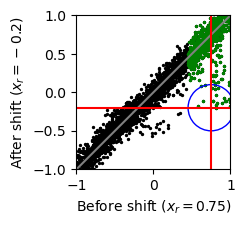

In [20]:
f,ax = plt.subplots(1,1,figsize=(3,2))    

x = np.array(allx).reshape(-1)
y = np.array(ally).reshape(-1)
radius = 0.3

ax.plot(np.linspace(-1,1,1000),np.linspace(-1,1,1000), color='gray')

indices = np.where((x >= goalcoords[0]-radius) & (x <= goalcoords[0]+radius))[0]
values_in_x = x[indices]
values_in_y = y[indices]
ax.scatter(x, y, color='k', s=2)

ax.scatter(values_in_x, values_in_y, color='g', s=2)
ax.axvline(goalcoords[1], color='r')
ax.axhline(goalcoords[2], color='r')
ax.set_xlabel('Before shift ($x_r=0.75$)')
ax.set_ylabel('After shift ($x_r=-0.2$)')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_aspect('equal')

target = np.array([0.75,-0.2])
circle1 = plt.Circle(target, radius, color='b', fill=False)
ax.add_patch(circle1)

remap_idx = np.linalg.norm(target - np.concatenate([values_in_x[:,None], values_in_y[:,None]],axis=1), axis=1)<=radius

print(np.sum(remap_idx), len(indices), 100*np.sum(remap_idx)/len(indices))